<a href="https://www.kaggle.com/code/brianlaurenszzz/university-ranking-prediction-with-lr-dt-and-rf?scriptVersionId=102054069" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Libraries**

In [1]:
import numpy as np 
import pandas as pd

# for visualiasion
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder #To convert categorical data to numeric
from sklearn.model_selection import train_test_split #For data split

#Model RandomForest, LogicticRegression, Decision Tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

#For model performance evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/world-university-rankings-202223/2023 QS World University Rankings.csv


# **Data**

In [2]:
df = pd.read_csv('/kaggle/input/world-university-rankings-202223/2023 QS World University Rankings.csv')
df.head(4)

,Rank,institution,location code,location,ar score,ar rank,er score,er rank,fsr score,fsr rank,...,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,score scaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,5,100.0,4,100.0,14,...,5,100.0,54,90.0,109,96.1,58,100.0,3,100
1,2,University of Cambridge,UK,United Kingdom,100.0,2,100.0,2,100.0,11,...,55,100.0,60,96.3,70,99.5,6,100.0,9,98.8
2,3,Stanford University,US,United States,100.0,4,100.0,5,100.0,6,...,9,99.8,74,60.3,235,96.3,55,100.0,2,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,3,100.0,3,100.0,8,...,64,98.8,101,98.4,54,99.9,3,100.0,7,98.4


In [3]:
df.shape

(1422, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           1422 non-null   int64  
 1   institution    1422 non-null   object 
 2   location code  1422 non-null   object 
 3   location       1422 non-null   object 
 4   ar score       1422 non-null   float64
 5   ar rank        1422 non-null   object 
 6   er score       1421 non-null   float64
 7   er rank        1422 non-null   object 
 8   fsr score      1420 non-null   float64
 9   fsr rank       1422 non-null   object 
 10  cpf score      1417 non-null   float64
 11  cpf rank       1422 non-null   object 
 12  ifr score      1324 non-null   float64
 13  ifr rank       1324 non-null   object 
 14  isr score      1365 non-null   float64
 15  isr rank       1365 non-null   object 
 16  irn score      1409 non-null   float64
 17  irn rank       1409 non-null   object 
 18  ger scor

In [5]:
df.isnull().any()

Rank             False
institution      False
location code    False
location         False
ar score         False
ar rank          False
er score          True
er rank          False
fsr score         True
fsr rank         False
cpf score         True
cpf rank         False
ifr score         True
ifr rank          True
isr score         True
isr rank          True
irn score         True
irn rank          True
ger score         True
ger rank          True
score scaled     False
dtype: bool

# **Pre-procesing**

In [6]:
#df.isin(['fillna']).any()
df2 = df.copy()
df2.drop(columns = ['institution','location','location code','ar rank','er rank','fsr rank','cpf rank','ifr rank','isr rank','irn rank','ger rank','score scaled'], inplace = True)
df2.head()

,Rank,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score
0,1,100.0,100.0,100.0,100.0,100.0,90.0,96.1,100.0
1,2,100.0,100.0,100.0,92.3,100.0,96.3,99.5,100.0
2,3,100.0,100.0,100.0,99.9,99.8,60.3,96.3,100.0
3,4,100.0,100.0,100.0,90.0,98.8,98.4,99.9,100.0
4,5,100.0,100.0,99.4,100.0,76.9,66.9,100.0,100.0


In [7]:
df2.isnull().sum()

Rank          0
ar score      0
er score      1
fsr score     2
cpf score     5
ifr score    98
isr score    57
irn score    13
ger score    12
dtype: int64

In [8]:
df2['er score'] = df2['er score'].replace(np.nan, 0)
df2['er score'] = df2['er score'].replace(0,df2['er score'].mean())
df2['er score'] = round(df2['er score'],1)

df2['fsr score'] = df2['fsr score'].replace(np.nan, 0)
df2['fsr score'] = df2['fsr score'].replace(0,df2['fsr score'].mean())
df2['fsr score'] = round(df2['fsr score'],1)

df2['cpf score'] = df2['cpf score'].replace(np.nan, 0)
df2['cpf score'] = df2['cpf score'].replace(0,df2['cpf score'].mean())
df2['cpf score'] = round(df2['cpf score'],1)

df2['ifr score'] = df2['ifr score'].replace(np.nan, 0)
df2['ifr score'] = df2['ifr score'].replace(0,df2['ifr score'].mean())
df2['ifr score'] = round(df2['ifr score'],1)

df2['isr score'] = df2['isr score'].replace(np.nan, 0)
df2['isr score'] = df2['isr score'].replace(0,df2['isr score'].mean())
df2['isr score'] = round(df2['isr score'],1)

df2['irn score'] = df2['irn score'].replace(np.nan, 0)
df2['irn score'] = df2['irn score'].replace(0,df2['irn score'].mean())
df2['irn score'] = round(df2['irn score'],1)

df2['ger score'] = df2['ger score'].replace(np.nan, 0)
df2['ger score'] = df2['ger score'].replace(0,df2['ger score'].mean())
df2['ger score'] = round(df2['ger score'],1)

#mean_ifrscore = df2['ifr score'].mean()
#df2['ifr score'] = df2['ifr score'].fillna(mean_ifrscore)

In [9]:
df2.isnull().sum()

Rank         0
ar score     0
er score     0
fsr score    0
cpf score    0
ifr score    0
isr score    0
irn score    0
ger score    0
dtype: int64

In [10]:
df2.head()

,Rank,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score
0,1,100.0,100.0,100.0,100.0,100.0,90.0,96.1,100.0
1,2,100.0,100.0,100.0,92.3,100.0,96.3,99.5,100.0
2,3,100.0,100.0,100.0,99.9,99.8,60.3,96.3,100.0
3,4,100.0,100.0,100.0,90.0,98.8,98.4,99.9,100.0
4,5,100.0,100.0,99.4,100.0,76.9,66.9,100.0,100.0


In [11]:
df2.describe()

,Rank,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score
count,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000
mean,711.500000,20.124684,20.657103,29.997117,24.528903,31.510689,26.503446,49.565823,26.185232
std,410.640354,22.802706,24.019472,28.152374,27.861805,32.976006,30.271530,30.066988,26.090177
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,356.250000,5.400000,4.400000,8.200000,3.100000,5.200000,3.400000,21.900000,6.800000
50%,711.500000,10.800000,10.300000,18.300000,11.300000,16.650000,12.350000,48.900000,15.700000
75%,1066.750000,23.775000,26.950000,43.475000,39.200000,48.975000,38.625000,77.375000,36.300000
max,1422.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


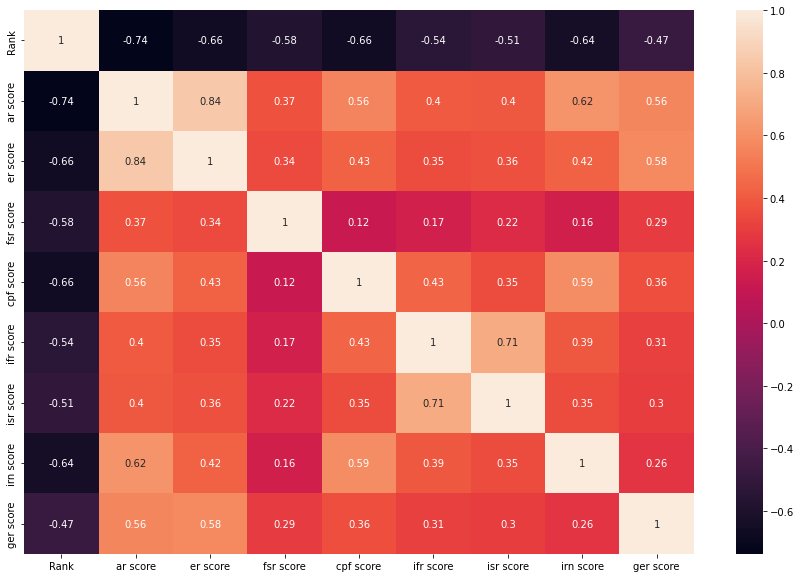

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(), annot=True);

# **Model**

In [13]:
#Splitting Data

train, test = train_test_split(df2, test_size=0.2, random_state=17)

print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")

No. of training examples: 1137
No. of testing examples: 285


In [14]:
#Mengambil X dan Y untuk Train
x_train=train.drop('Rank',axis=1)
y_train=train[['Rank']]

#Mengambil X dan Y untuk Test
x_test=test.drop('Rank',axis=1)
y_test=test[['Rank']]

#Shapes dari x_train,y_train and test data
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1137, 8), (1137, 1), (285, 8), (285, 1))

In [15]:
x_train.head(2)

,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score
241,36.1,50.5,21.2,41.9,80.6,54.2,85.2,35.3
226,7.8,1.7,97.7,80.9,38.2,1.7,56.9,4.2


In [16]:
y_train.head(2)

,Rank
241,242
226,227


# **Linear Regression**

In [17]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [18]:
lr_score = lr.score(x_test, y_test)
lr_score

0.8299839207234502

In [19]:
y_pred = lr.predict(x_test)
print(y_pred.flatten()[:5])
print(y_test.values.flatten()[:5])

[ 651.08973161  137.29798712  811.65869701  727.35125988 1133.88421682]
[524 199 823 428 915]


In [20]:
lr_mse = mean_squared_error(y_test.values, y_pred)
lr_rmse = mean_squared_error(y_test.values, y_pred,squared=False) #RMSE
lr_mae = mean_absolute_error(y_test.values, y_pred)
lr_r = r2_score(y_test.values, y_pred)

print('Score Mean Squared Error      = {}'.format(lr_mse))
print('Score Root Mean Squared Error = {}'.format(lr_rmse))
print('Score Mean Absolute Error     = {}'.format(lr_mae))
print('Score R2                      = {}'.format(lr_r))

Score Mean Squared Error      = 30353.031242483332
Score Root Mean Squared Error = 174.22121352603227
Score Mean Absolute Error     = 144.47887779666078
Score R2                      = 0.8299839207234502


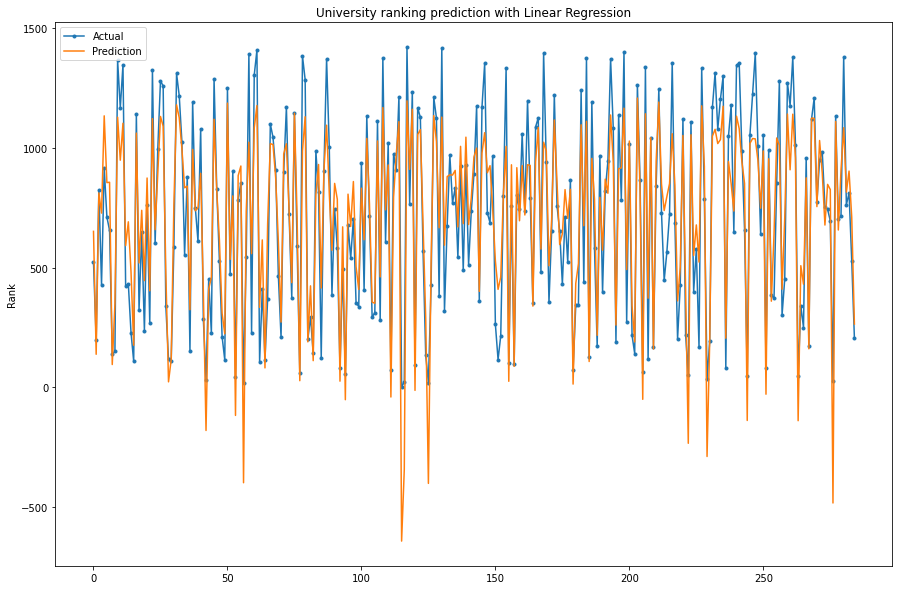

In [21]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Actual")
plt.plot(range(len(y_test)), y_pred.flatten(), label="Prediction")
plt.ylabel('Rank')
plt.title('University ranking prediction with Linear Regression')
plt.legend()
plt.show()

In [22]:
prediction = pd.DataFrame()
prediction['Actual'] = y_test.values.flatten()
prediction['Linear Regression'] = y_pred.flatten()
prediction['Linear Regression'] = prediction['Linear Regression'].round(0)
prediction.head()

,Actual,Linear Regression
0,524,651.0
1,199,137.0
2,823,812.0
3,428,727.0
4,915,1134.0


# **Decision Tree**

In [23]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [24]:
dt_score = dt.score(x_test, y_test)
dt_score

0.9196764642410334

In [25]:
y_pred = dt.predict(x_test)
print(y_pred.flatten()[:5])
print(y_test.values.flatten()[:5])

[621. 299. 803. 478. 925.]
[524 199 823 428 915]


In [26]:
dt_mse = mean_squared_error(y_test.values, y_pred)
dt_rmse = mean_squared_error(y_test.values, y_pred,squared=False) #RMSE
dt_mae = mean_absolute_error(y_test.values, y_pred)
dt_r = r2_score(y_test.values, y_pred)

print('Score Mean Squared Error      = {}'.format(dt_mse))
print('Score Root Mean Squared Error = {}'.format(dt_rmse))
print('Score Mean Absolute Error     = {}'.format(dt_mae))
print('Score R2                      = {}'.format(dt_r))

Score Mean Squared Error      = 14340.189473684211
Score Root Mean Squared Error = 119.75053016034714
Score Mean Absolute Error     = 84.71578947368421
Score R2                      = 0.9196764642410334


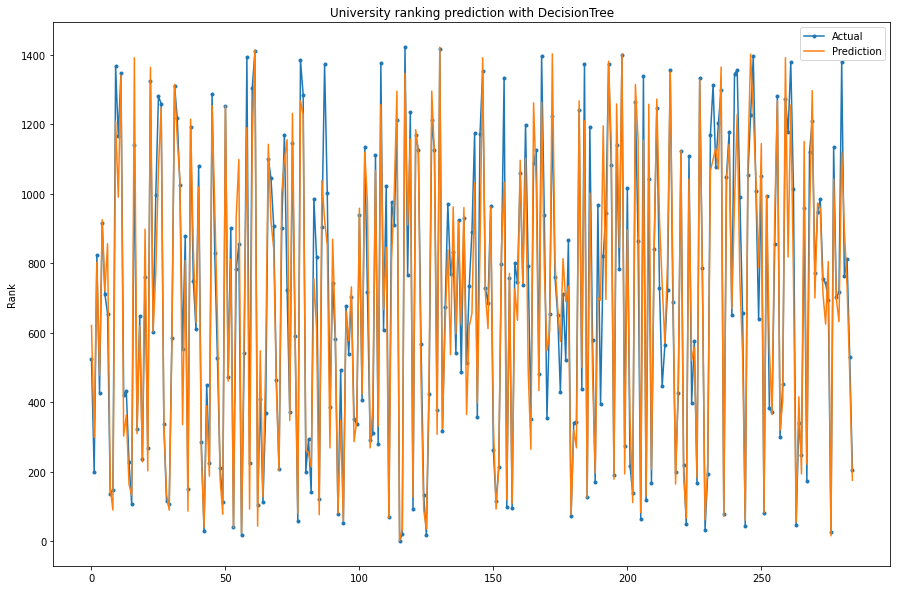

In [27]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Actual")
plt.plot(range(len(y_test)), y_pred.flatten(), label="Prediction")
plt.ylabel('Rank')
plt.title('University ranking prediction with DecisionTree')
plt.legend()
plt.show()

In [28]:
prediction['DecisionTree'] = y_pred.flatten()
prediction['DecisionTree'] = prediction['DecisionTree'].round(0)
prediction.head(4)

,Actual,Linear Regression,DecisionTree
0,524,651.0,621.0
1,199,137.0,299.0
2,823,812.0,803.0
3,428,727.0,478.0


# **Random Forest**

In [29]:
rf = RandomForestRegressor(max_depth=10, random_state=0)

rf.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(max_depth=10, random_state=0)

In [30]:
rf_score = rf.score(x_test, y_test)
rf_score

0.9641427363034865

In [31]:
y_pred = rf.predict(x_test)
print(y_pred.flatten()[:5])
print(y_test.values.flatten()[:5])

[560.39167262 258.8069243  742.28406065 496.91639253 967.3617238 ]
[524 199 823 428 915]


In [32]:
rf_mse = mean_squared_error(y_test.values, y_pred)
rf_rmse = mean_squared_error(y_test.values, y_pred,squared=False) #RMSE
rf_mae = mean_absolute_error(y_test.values, y_pred)
rf_r = r2_score(y_test.values, y_pred)

print('Score Mean Squared Error      = {}'.format(rf_mse))
print('Score Root Mean Squared Error = {}'.format(rf_rmse))
print('Score Mean Absolute Error     = {}'.format(rf_mae))
print('Score R2                      = {}'.format(rf_r))

Score Mean Squared Error      = 6401.610070538528
Score Root Mean Squared Error = 80.01006230805302
Score Mean Absolute Error     = 58.62199805586843
Score R2                      = 0.9641427363034865


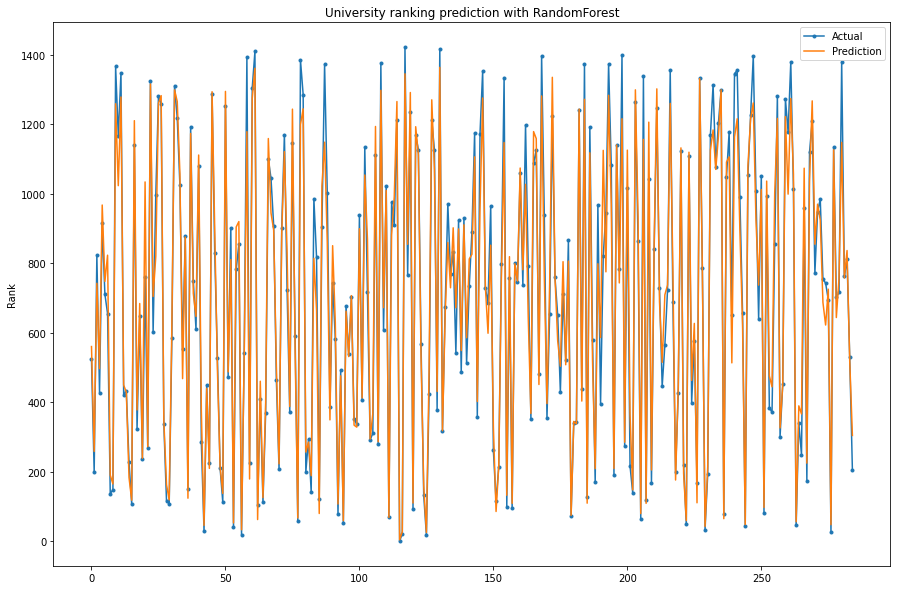

In [33]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Actual")
plt.plot(range(len(y_test)), y_pred.flatten(), label="Prediction")
plt.ylabel('Rank')
plt.title('University ranking prediction with RandomForest')
plt.legend()
plt.show()

In [34]:
prediction['RandomForest'] = y_pred.flatten()
prediction['RandomForest'] = prediction['RandomForest'].round(0)
prediction.head(4)

,Actual,Linear Regression,DecisionTree,RandomForest
0,524,651.0,621.0,560.0
1,199,137.0,299.0,259.0
2,823,812.0,803.0,742.0
3,428,727.0,478.0,497.0


# **Comparison**

In [35]:
print('Score MSE LinearRegression  = {}'.format(lr_mse))
print('Score MSE DecisionTree      = {}'.format(dt_mse))
print('Score MSE RandomForest      = {}'.format(rf_mse))

print('='*55)
print('Score RMSE LinearRegression = {}'.format(lr_rmse))
print('Score RMSE DecisionTree     = {}'.format(dt_rmse))
print('Score RMSE RandomForest     = {}'.format(rf_rmse))

print('='*55)
print('Score MAE LinearRegression  = {}'.format(lr_mae))
print('Score MAE DecisionTree      = {}'.format(dt_mae))
print('Score MAE RandomForest      = {}'.format(rf_mae))

print('='*55)
print('Score R2 Linear Regression  = {}'.format(lr_r))
print('Score R2 DecisionTree       = {}'.format(dt_r))
print('Score R2 RandomForest       = {}'.format(rf_r))


Score MSE LinearRegression  = 30353.031242483332
Score MSE DecisionTree      = 14340.189473684211
Score MSE RandomForest      = 6401.610070538528
Score RMSE LinearRegression = 174.22121352603227
Score RMSE DecisionTree     = 119.75053016034714
Score RMSE RandomForest     = 80.01006230805302
Score MAE LinearRegression  = 144.47887779666078
Score MAE DecisionTree      = 84.71578947368421
Score MAE RandomForest      = 58.62199805586843
Score R2 Linear Regression  = 0.8299839207234502
Score R2 DecisionTree       = 0.9196764642410334
Score R2 RandomForest       = 0.9641427363034865
